# Финальный проект курса

____
Вы добрались до финального проекта, вами была проделана огромная работа и более не остается причин не применить новые знания и навыки проведения своего собственного полноценного исследования данных. В этой заключительной Jupyter тетрадке мы предоставим полное и подробное описание природы данных проекта и их источника. Также в данной тетрадке мы оставим наш вариант реализации такого исследования, но вы не должны считать это решение эталоном. Мы лишь хотим показать наше видение подобного рода проектов, как бы мы подошли к решению таких сценариев с учетом большого опыта в аналитике. Преждем, чем посмотреть наше решение завершите свой вариант, а затем сравните результаты.

Помимо рекомендаций и основных идей для исследования мы постарались оставить и немало пространства для творчества и реализации самых смелых идей, которые могут прийти к вам в голову. Это позволит, как мы надеемся, добится уникальности проекта каждого из студентов. Впоследествии вы легко сможете выложить свое исследование на Github и использовать в качестве портфолио или пет-проекта.

Экспериментируйте, думайте, действуйте, не бойтесь реализовывать даже самые странные идеи! Ведь именно через практику преобретаются навыки и опыт. Лучший способ научиться программировать - это сесть и написать какой-либо код, решить задачу. Лучший способ освоить анализ данных - это взять данные и проанализировать их. Все необходимые инструменты для этого у вас уже есть!
____

## Небольшое введение

Для финального проекта мы выбрали, вероятно, не самые типичные данные, но наш выбор был обусловлен одной важной причиной. Эти данные, в которые вы совсем скоро сможете окунуться, являются настояющими, можно сказать, "живыми" данными, что очень важно для тренировки ваших навыков. С реальными данными работать всегда интереснее и значительно более полезно для развития в аналитике, это факт.

Что ж, приготовьтесь отправится в... кругосветное плавание! Да, вас ждет целое путешествие как в мир данных, так и вокруг земного шара с группой исследователей-океанографов. Вы станете частью команды ученых и будете помогать коллегам, анализируя собираемые ими данные со специальных метеорологических станций (буёв), расположенных по всему мировому океану.

## Описание данных

Итак, перейдем ближе к делу. В рамках проекта вам предстоит погрузиться в работу над данными, собираемыми научно-исследовательским институтом NDBC (National Data Buoy Center). Вот ссылка на их официальный сайт:

https://www.ndbc.noaa.gov/

NDBC это такой открытый проект, который позволяет бесплатно и практически без ограничений получать данные с их метеостанций. На официальном сайте есть карта всех действующих буев, но что самое главное и интересное - у этого проекта есть целое сообщество, разработавшее удобную библиотеку на python, для получения данных по API. То, что нужно. У проекта есть репозиторий на гитхабе, подробное описание данных и примеры использования библиотеки.

https://github.com/CDJellen/ndbc-api

Все же, мы также добавим здесь это описание и несколько примеров получения данных, после чего составим план действий.

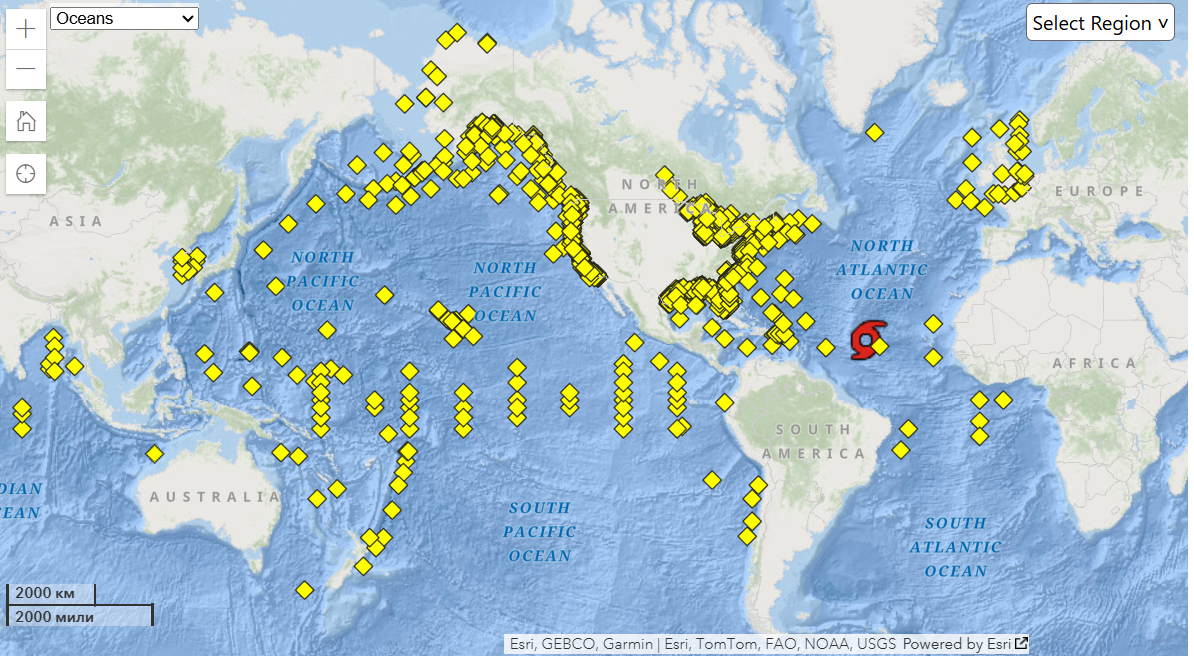

Перед вами карта, на которой отмечены все действующие станции. Станции разделяются на несколько типов, каждый такой тип предназначен для определенных видов измерений. При этом одна станция может сочетать в себе сразу несколько возможностей для измерений. Иными словами, станции, имеющие такой режим измерений могут предоставлять данные об:

* `adcp`: океанских течениях на разных глубинах.
* `cwind`: высокочастотных измерениях скорости и направления ветра.
* `ocean`: океанографических данных, включая температуру воды, соленость и измерения волн.
* `spec`: энергии и направлении волн.
* `stdmet`: стандартных метео показателях, включая температуру воздуха, давление, скорость ветра и видимость.
* `supl`: некоторых дополнительных измерениях, которые могут различаться в зависимости от конкретного буя и его датчиков.
* `swden`: распределении волновой энергии по различным частотам.
* `swdir`: первичном направление волновой энергии.
* `swdir2`: дополнительных измерениях с информацией о направлении волн.
* `swr1`: высоте и периоде волн.
* `swr2`: более высокой детализации измерений высоты и направления волн.


Очевидно, нам понадобятся далеко не все режимы измерений, а только самые основные. Например, станция **15009** может измерять только температуру воды и скорость ветра, а станция **tplm2** может делать все это и плюс отдавать высокочастотные измерения скорости и направления ветра, то есть она имеет два режима измерения. Как получить все эти данные мы увидим прямо сейчас, но сперва завершим описание.

Помимо режимов измерения каждая станция имеет свои метаданные. Это информация о том, на какой глубине станция измеряет температуру воды, географические координаты станции, ее тип, название и др. Все эти данные можно также получить для кажого буя. Часть станций может хранить только исторические данные, а часть текущие и исторические, причем это зависит также и от имеющихся на станции режимов измерения. Например, определенная станция может передавать информацию о высоте волн только на текущий момент, а исторические данные хранит только о температуре и направлении ветра. Текущими являются данные, доступные в виде скользящего окна за последние **45** дней. Исторические же данные хранятся в отдельных файлах на сайте института.

Теперь перейдем к непосредственному получению исходных данных.

## Получение данных

Сперва необходимо установить библиотеку ndbc-api, которая позволит легко подключаться к API без использования громоздких ссылок и параметров в них. 

In [2]:
#pip install ndbc-api

Теперь импортируем установленный модуль и создаем объект API. Переменная api будет являться объектом класса NdbcApi, а значит имеет различные методы. Рассмотрим те, которые понадобятся для проекта:

In [1]:
import pandas as pd
from ndbc_api import NdbcApi

api = NdbcApi()

### Список всех станций

Получить список всех действуйющих буев можно методом stations():

In [2]:
all_stations = api.stations()
all_stations.head(3)

,Station,Lat,Lon,Elevation,Name,Owner,Program,Type,Includes Meteorology,Includes Currents,Includes Water Quality,DART Program
0,0y2w3,44.794,-87.313,179.0,"Sturgeon Bay CG Station, WI",U.S.C.G. Marine Reporting Stations,IOOS Partners,fixed,False,False,False,False
1,13001,12.000,-23.000,0.0,NE Extension,Prediction and Research Moored Array in the At...,International Partners,buoy,True,False,False,False
2,13002,21.000,-23.000,0.0,NE Extension,Prediction and Research Moored Array in the At...,International Partners,buoy,True,False,False,False


Давайте рассмотрим каждое поле в отдельности:

 - **Station** - Уникальный идентификатор станции (буя). Это тот самый ID, который вы будете используете для запросов данных по ним  ('13001', '0y2w3')
 - **Lat** - Географическая широта
 - **Lon** - Географическая долгота
 - **Elevation** - Высота буя над уровнем моря. Может показаться странным, но не у всех станций это значение равно 0
 - **Name** - Название станции
 - **Owner** - Организация-владелец, которая обслуживает данный буй
 - **Program** - Программа или сеть, к которой относится станция. Например, "IOOS Partners" (партнеры Интегрированной системы наблюдения за океаном) или "International Partners" (международные партнеры)
 - **Type** - Тип станции, **buoy**: плавучий буй, который может дрейфовать или быть закреплен на якоре. **fixed**: стационарная, неподвижная станция (например, на пирсе или платформе)
 - **Includes Meteorology** - Показывает, есть ли на станции метеорологические датчики. Это означает, что вы можете запрашивать данные типа **'stdmet'** (ветер, температура, давление и т.д.)
 - **Includes Currents** - Показывает, измеряет ли станция океанические течения
 - **Includes Water Quality** - Показывает, есть ли датчики для анализа качества воды
 - **DART Program** - Является ли станция частью программы DART — сети буев для обнаружения и предупреждения о цунами в глубоком океане.

### Список всех режимов измерения

В описании мы уже расшифровывали весь список типов измерений. Этот список можно также получить методом get_modes():

In [3]:
api.get_modes()

['adcp',
 'cwind',
 'ocean',
 'spec',
 'stdmet',
 'supl',
 'swden',
 'swdir',
 'swdir2',
 'swr1',
 'swr2']

### Ближайшие станции по координатам

API NDBC имеет в запасе еще один полезный и удобный метод. Он позволяет находить ближайшую к заданной точке станцию. Например, мы хотим узнать, какая станция наиболее близко расположена к точке с координатами 26.00N (северной широты) и 152.46E (восточной долготы):

In [4]:
api.nearest_station(lat=26.00, lon=152.46)

'21413'

In [5]:
api.nearest_station(lat="26.00N", lon="152.46E")

'21413'

Возможны два варианта передачи аргументов гео координат. В итоге мы получаем станцию **21413**. Также мы можем получить список всех станций в заданном радиусе от целевой точки. Давайте выведем все станции в радиусе 1200 км от данной точки:

In [9]:
api.radial_search(lat="26.00N", lon="152.46E", radius=1200, units="km")

,Station,Lat,Lon,Elevation,Name,Owner,Program,Type,Includes Meteorology,Includes Currents,Includes Water Quality,DART Program,distance
17,21413,30.487,152.148,0.0,"SOUTHEAST TOKYO - 700NM ESE of Tokyo, JP",NDBC,Tsunami,dart,False,False,False,True,500.415148
536,52401,19.285,155.739,<NA>,NORTHEAST SAIPAN - 610 NM ENE of Saipan,NDBC,Tsunami,dart,False,False,False,False,819.774709
56,28401,32.384,144.540,0.0,Kuroshio Extension Observatory (KEO),NOAA/PMEL,IOOS Partners,buoy,False,False,False,False,1046.889819


### Метаданные станции

Теперь перейдем к получению метаданных станций. Возьмем для примера станцию **21413**. Взгляните на код:

In [10]:
api.station(station_id="21413")

{'Water depth': '5818 m',
 'Site elevation': 'sea level',
 'Location': '30.487 N 152.148 E (30°29\'12" N 152°8\'54" E)',
 'Statation Type': 'Owned and maintained by National Data Buoy Center, 2.6-meter discus buoy, DART II payload',
 'Name': 'Station 21413  - SOUTHEAST TOKYO - 700NM ESE of Tokyo, JP'}

Или второй вариант:

In [12]:
api.station(station_id="21413", as_df=True).T

,Water depth,Site elevation,Location,Statation Type,Name
0,5818 m,sea level,"30.487 N 152.148 E (30°29'12"" N 152°8'54"" E)",Owned and maintained by National Data Buoy Cen...,Station 21413 - SOUTHEAST TOKYO - 700NM ESE o...


Также важно знать, какие режимы измерения имеет каждая станция. Это можно выяснить с помощью методов available_realtime и available_historical. Например:

In [24]:
api.available_realtime(station_id="tplm2")

['cwind', 'stdmet']

На данный момент станция **tplm2** может передавать данные за последние 45 дней о параметрах ветра и стандартных метео параметрах. Вызвав метод available_historical для этой станции мы получим список ссылок на файлы с историческими данными на сайте института. Эти файлы можно впоследствии скачать и использовать для анализа. 

In [23]:
api.available_historical(station_id="tplm2")

{'Standard meteorological data': {'Jan 2025': 'https://www.ndbc.noaa.gov/download_data.php?filename=tplm212025.txt.gz&dir=data/stdmet/Jan/',
  'Feb 2025': 'https://www.ndbc.noaa.gov/download_data.php?filename=tplm222025.txt.gz&dir=data/stdmet/Feb/',
  'Mar 2025': 'https://www.ndbc.noaa.gov/download_data.php?filename=tplm232025.txt.gz&dir=data/stdmet/Mar/',
  'Apr 2025': 'https://www.ndbc.noaa.gov/download_data.php?filename=tplm242025.txt.gz&dir=data/stdmet/Apr/',
  'May 2025': 'https://www.ndbc.noaa.gov/download_data.php?filename=tplm252025.txt.gz&dir=data/stdmet/May/',
  'Jul 2025': 'https://www.ndbc.noaa.gov/data/stdmet/Jul/tplm2.txt',
  '1985': 'https://www.ndbc.noaa.gov/download_data.php?filename=tplm2h1985.txt.gz&dir=data/historical/stdmet/',
  '1986': 'https://www.ndbc.noaa.gov/download_data.php?filename=tplm2h1986.txt.gz&dir=data/historical/stdmet/',
  '1987': 'https://www.ndbc.noaa.gov/download_data.php?filename=tplm2h1987.txt.gz&dir=data/historical/stdmet/',
  '1988': 'https:/

___
**Обратите внимание**, далеко не каждая станция способна отдавать текущие данные, станция может находится на тех обслуживании, или же в процессе передачи данных на серверах института возникают временные проблемы. Это отличная иллюстрация тех проблем, с которыми аналитики сталкиваются в реальной работе. В проекте вам необходимо будет учитывать такие кейсы (вспомните тему обработки ошибок в python, конструкцию try .. except..). Например, на момент написания авторами данного текста станция **21413** не имела возможности передавать текущие данные:
___

In [16]:
api.available_realtime(station_id="21413")

ResponseException: NDBC API: Failed to handle returned data.

### Получение данных за заданный интервал

Для получения уже самих метео данных за определенный период времени используется метод get_data. Здесь важно отметить, что у всех  станций период доступных данных может сильно различаться. Часть станций были установлены, очевидно, позднее, а часть - раньше. Также станции постоянно обновляются, проходят обслуживание, поэтому в такие периоды могут возникать пробелы в данных и вам придется это учитывать при работе над проектом.

Тем не менее мы можем получить тестовый набор для наглядности. Давайте получим стандартные метео данные (stdmet) за весь 2023 год со станции **tplm2**:

In [33]:
df_stdmet_tplm2 = api.get_data(
    'tplm2',
    'stdmet', 
    '2023-01-01',
    '2023-12-31',
    as_df=True
)

In [35]:
df_stdmet_tplm2.head()

,,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
timestamp,station_id,,,,,,,,,,,,,
2023-01-01 00:00:00,tplm2,141.0,6.9,7.2,NaN,NaN,NaN,NaN,1011.3,10.5,NaN,NaN,NaN,NaN
2023-01-01 01:00:00,tplm2,182.0,5.5,5.7,NaN,NaN,NaN,NaN,1011.5,10.1,NaN,NaN,NaN,NaN
2023-01-01 02:00:00,tplm2,172.0,6.5,6.7,NaN,NaN,NaN,NaN,1011.8,8.5,NaN,NaN,NaN,NaN
2023-01-01 03:00:00,tplm2,87.0,0.4,0.7,NaN,NaN,NaN,NaN,1010.6,7.4,NaN,NaN,NaN,NaN
2023-01-01 04:00:00,tplm2,224.0,3.6,3.7,NaN,NaN,NaN,NaN,1011.1,12.0,NaN,NaN,NaN,NaN


В метод get_data мы передали ряд параметров, а именно:

 - идентификатор станции
 - тип метеорологических данных
 - дата начала периода
 - дата окончания периода
 - флаг преобразования возвращаемого набора данных сразу же в структуру DataFrame. Это очень удобно, но вы также можете поменять этот папаметр на False, получив обычный словарь списков python в качестве результата.

Приведем расшифровку полей полученных данных:


*Метрики ветра:*

 - **WDIR** (Wind Direction): Направление ветра. Описание: Направление, откуда дует ветер, указанное в градусах (от 0° до 359°). 0° — это север, 90° — восток, 180° — юг, 270° — запад. Единицы: Градусы (°).

 - **WSPD** (Wind Speed): Скорость ветра. Описание: Средняя скорость ветра за определенный период (обычно за 8 минут). Единицы: Метры в секунду (м/с).

 - **GST** (Gust Speed): Скорость порывов ветра. Описание: Максимальная скорость ветра, зафиксированная за 5-секундный интервал в течение отчетного периода. Единицы: Метры в секунду (м/с).


*Метрики волн:*

 - **WVHT** (Wave Height): Значительная высота волны. Описание: Средняя высота одной трети самых высоких волн. Это значение лучше всего соответствует тому, как человек визуально оценил бы высоту волн. Единицы: Метры (м).

 - **DPD** (Dominant Period): Доминантный период волны. Описание: Период (время между гребнями) волн, которые несут больше всего энергии. Единицы: Секунды (с).

 - **APD** (Average Period): Средний период волны. Описание: Средний период всех измеряемых волн. Единицы: Секунды (с).

 - **MWD** (Mean Wave Direction): Среднее направление волн. Описание: Направление, откуда приходят волны. Единицы: Градусы (°).


*Атмосферные и температурные метрики:*

 - **PRES** (Pressure): Атмосферное давление. Описание: Давление воздуха на уровне моря. Единицы: Гектопаскали (гПа), что эквивалентно миллибарам.

 - **ATMP** (Air Temperature): Температура воздуха. Единицы: Градусы Цельсия (°C).

 - **WTMP** (Water Temperature): Температура воды. Описание: Температура на поверхности воды. Единицы: Градусы Цельсия (°C).

 - **DEWP** (Dew Point): Точка росы. Описание: Температура, до которой должен охладиться воздух, чтобы содержащийся в нем пар превратился в росу. Показывает влажность воздуха. Единицы: Градусы Цельсия (°C).


*Прочие метрики:*

 - **VIS** (Visibility): Видимость. Описание: Дальность видимости на станции. Единицы: Морские мили.

 - **PTDY** (Pressure Tendency): Тенденция давления. Описание: Изменение атмосферного давления за последние три часа. Единицы: Гектопаскали (гПа).

 - **TIDE** (Tide): Уровень прилива/отлива. Описание: Отклонение уровня воды от среднего значения. Единицы: Метры (м).

Помимо получения только одного типа данных с единственной станции мы также можем получать сразу же несколько разных типов данных с целого списка станций. Для этого необходимо использовать ключевые аргументы, взгляните на пример:

In [ ]:
df_annapolis_met = api.get_data(
    station_ids=['tplm2', 'apam2', 44063, 'CPVM2'],
    modes=['stdmet'],
    start_time='2023-01-01',
    end_time='2024-01-01',
    as_df=True
)

В данном случае важно помнить, что не все из переданного списка станции могут поддерживать все режимы из переданного списка измерений. В таком случае API возвращает ошибку, но разработчики библиотеки предусмотрели это и в теории все должно пройти гладко (недоступные данные заполнятся просто как NaN). 

У библиотеки ndbc-api есть и множество других различных методов, включающих продвинутые примемы сжатия данных для сохранения на диск, отличные от DataFrame структуры для получения данных и др. Но нас в первую очередь интересует самый типичный сценарий работы с данными - с использованием DataFrame и средства библиотеки pandas (по крайней мере в рамках этого проекта).

В заключении отметим еще одну особенность, которая может показаться вам полезной. При работе с ndbc-api можно настроить логирование запросов, чтобы ясно видеть, какие данные приходят успешно, а с какими данными и станциями возникают проблемы и по какой причине:

In [36]:
import logging

api.configure_logging(level=logging.DEBUG)

In [37]:
api.get_data(
    station_ids=['tplm2', 'apam2'],
    modes=['stdmet', 'cwind'],  # cwind is not available for 'apam2' so we will log an error and continue
    start_time='2023-01-01',
    end_time='2024-01-01',
)

[DEBUG]: {'message': "`get_data` called with arguments: {'self': <ndbc_api.ndbc_api.NdbcApi object at 0x000001CA7FD29910>, 'station_id': None, 'mode': None, 'start_time': '2023-01-01', 'end_time': '2024-01-01', 'use_timestamp': True, 'as_df': True, 'cols': None, 'station_ids': ['tplm2', 'apam2'], 'modes': ['stdmet', 'cwind'], 'as_xarray_dataset': False, 'use_opendap': None}"}
{'message': "`get_data` called with arguments: {'self': "
            '<ndbc_api.ndbc_api.NdbcApi object at 0x000001CA7FD29910>, '
            "'station_id': None, 'mode': None, 'start_time': '2023-01-01', "
            "'end_time': '2024-01-01', 'use_timestamp': True, 'as_df': True, "
            "'cols': None, 'station_ids': ['tplm2', 'apam2'], 'modes': "
            "['stdmet', 'cwind'], 'as_xarray_dataset': False, 'use_opendap': "
            'None}'}
[INFO]: {'message': "Processing request for station_ids ['tplm2', 'apam2'] and modes ['stdmet', 'cwind']"}
{'message': "Processing request for station_ids ['tplm

,,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,GDR,GTIME
timestamp,station_id,,,,,,,,,,,,,,,
2023-01-01 00:00:00,tplm2,141.0,6.9,7.2,NaN,NaN,NaN,NaN,1011.3,10.5,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 01:00:00,tplm2,182.0,5.5,5.7,NaN,NaN,NaN,NaN,1011.5,10.1,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 02:00:00,tplm2,172.0,6.5,6.7,NaN,NaN,NaN,NaN,1011.8,8.5,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 03:00:00,tplm2,87.0,0.4,0.7,NaN,NaN,NaN,NaN,1010.6,7.4,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 04:00:00,tplm2,224.0,3.6,3.7,NaN,NaN,NaN,NaN,1011.1,12.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 23:20:00,tplm2,140.0,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-31 23:30:00,tplm2,144.0,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-31 23:40:00,tplm2,142.0,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Логи состоят из трех частей: Уровень, Источник и Сообщение.

**УРОВЕНЬ**: {'источник': 'значение', 'message': 'Текст сообщения'}

*1. Уровень важности (Log Level).* Это маркер, который показывает, насколько важно данное сообщение. Вот основные уровни от менее к более важным:

 - **DEBUG** (Отладка): Самая подробная информация, полезная только программисту для поиска ошибок.

[DEBUG]: {'station_id': 'tplm2', 'message': 'Found station tplm2 in cache.'}

*Расшифровка*: "Просто для информации разработчику: я нашел станцию tplm2 в кэше и не буду запрашивать её заново с сервера".

 - **INFO** (Информация): Основные шаги выполнения программы. Показывает, что всё идет по плану.

[INFO]: {'message': 'Handling 2 requests for station tplm2.'}

*Расшифровка*: "Программа начала обрабатывать 2 запроса для станции tplm2. Всё в порядке, я работаю".

 - **WARNING** (Предупреждение): Что-то пошло не так, но это не критично, и программа может продолжать работу.

Пример: [WARNING]: {'station_id': 'XYZ', 'message': 'Realtime data not available.'}

Расшифровка: "Внимание! Для станции XYZ нет данных в реальном времени, я пропускаю её, но продолжаю работать с остальными".

 - **ERROR** (Ошибка): Произошла серьезная ошибка, из-за которой часть программы не смогла выполниться.

Пример: [ERROR]: {'url': '...', 'message': 'Failed to fetch data after 3 retries.'}

Расшифровка: "Проблема! Я не смог скачать данные по этому адресу даже после 3 попыток".

 - **CRITICAL** (Критическая ошибка): Произошло что-то, что ломает всю программу. Дальнейшая работа невозможна.


*2. Сообщение (Message).* Это сам текст, который описывает событие. В нашем примере он структурирован как словарь Python, что очень удобно для автоматического анализа логов. Например, можно легко отфильтровать все сообщения, относящиеся к station_id: 'apam2'.

Таким образом вы можете воспользоваться и такими возможностями, правда в начале работы над проектом и, в целом, при работе с данными аналитики редко используют логи. Обычно это территории разработчиком или дата инженеров. Тем не менее об этом полезно знать и теперь у вас есть наглядный пример на эту тему.

## Заметки

 - Общий обзор всех станций. В каких океанах какие измерения доступны
 - Карта ветров. Зависимость скорости ветра от интенсивности волн или теспературы. Розы ветров
 - Зависимость метео данных на суше и на воде (с использованием open-meteo.com)
 - Система поиска и предупреждения о штормах